In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets read in the dataset

In [3]:
df_train = pd.read_excel('train__1_.xlsx')

Lets print the first few lines

In [4]:
df_train.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners
0,2826,793,2005-04-02,410,908,2.0,0.0,15,1
1,2827,793,2005-04-02,338,597,3.0,2.0,3,6
2,2828,793,2005-04-02,1364,246,2.0,3.0,13,2
3,2829,793,2005-04-02,1088,1397,1.0,0.0,2,5
4,2830,793,2005-04-02,830,1412,2.0,3.0,3,6


In [5]:
df_train.dtypes

MatchId                  int64
LeagueId                 int64
Date            datetime64[ns]
HomeTeamId               int64
AwayTeamId               int64
Home_Goals             float64
Away_Goals             float64
Home_Corners             int64
Away_Corners             int64
dtype: object

In [6]:
df_train.shape

(23830, 9)

It seems to have 23830 football matches with 9 columns. The columns seem to have a matchid, leagueid and hometeamid and awayteamid, Ill see how many unique values are there for each of them and if there are any missing values

In [7]:
df_train['HomeTeamId'].unique().shape

(332,)

In [8]:
df_train['AwayTeamId'].unique().shape

(333,)

In [9]:
df_train['LeagueId'].unique().shape

(13,)

In [10]:
df_train['MatchId'].unique().shape

(23830,)

Of the 23830 matches, they seem to be spread across 13 leagues with 332 home teams and 333 away teams. So there are 333 unique teams.

In [11]:
print(df_train['MatchId'].isna().sum())
print(df_train['LeagueId'].isna().sum())
print(df_train['HomeTeamId'].isna().sum())
print(df_train['AwayTeamId'].isna().sum())

0
0
0
0


Lets calculate some summary statistics for a team against another

In [12]:
summary_by_team = df_train.groupby(['HomeTeamId', 'AwayTeamId', 'LeagueId']).agg(
    {
        'Home_Corners' : 'mean',
        'Away_Corners' : 'mean',
        'Home_Goals' : 'mean',
        'Away_Goals': ['mean', 'count'],
    }
)

In [13]:
summary_by_team.columns = ['_'.join(col).strip() for col in summary_by_team.columns.values]
summary_by_team = summary_by_team.reset_index()

In [14]:
summary_by_team

,HomeTeamId,AwayTeamId,LeagueId,Home_Corners_mean,Away_Corners_mean,Home_Goals_mean,Away_Goals_mean,Away_Goals_count
0,192,232,811,5.2,4.2,2.0,0.0,5
1,192,276,811,7.5,1.5,1.0,0.5,2
2,192,316,811,4.6,3.6,1.2,0.4,5
3,192,353,811,6.5,2.0,1.5,0.5,2
4,192,463,811,5.2,5.8,1.6,0.4,5
...,...,...,...,...,...,...,...,...
11497,9998,2499,813,0.0,9.0,1.0,0.0,1
11498,9998,2501,813,7.0,1.0,1.0,2.0,1
11499,9998,2595,813,4.0,2.0,1.0,4.0,1
11500,9998,2596,813,5.0,2.0,1.0,2.0,1


Let me group by league Id and see if there are league specific statistics

In [15]:
summary_by_league = df_train.groupby(['LeagueId']).agg(
    {
        'Home_Corners' : 'mean',
        'Away_Corners' : 'mean',
        'Home_Goals' : 'mean',
        'Away_Goals': ['mean', 'count'],
    }
)

In [16]:
summary_by_league.columns = ['_'.join(col).strip() for col in summary_by_league.columns.values]
summary_by_league= summary_by_league.reset_index()

In [17]:
summary_by_league.head(14)

,LeagueId,Home_Corners_mean,Away_Corners_mean,Home_Goals_mean,Away_Goals_mean,Away_Goals_count
0,729,6.146967,4.747385,1.569859,1.156986,1911
1,734,5.376136,4.051136,1.374432,0.948864,1760
2,741,6.084580,4.539453,1.634863,1.140278,1939
3,764,5.772134,4.812772,1.522496,1.162554,689
4,776,5.401676,4.342360,1.575113,1.139265,1551
5,781,5.659406,4.846535,1.444004,1.165510,1009
6,793,6.073363,4.897291,1.491340,1.140813,2656
7,795,5.540909,4.153896,1.627922,1.252597,1540
8,800,5.704488,4.392041,1.488569,1.060965,2362
9,801,5.773071,4.478064,1.496468,1.081736,1982


I am now thinking about the features, for each game I would like to build a cumulative statistics for the mean of the corners and goals scored and conceded for the home team and for the away team and then add a head to head statistics both home and away. Then Ill add the same cumulative statistics for like say the recent form so far may be like the last 5 games in the league at home.

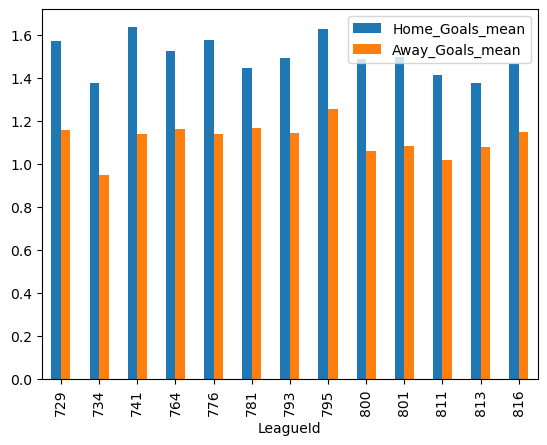

In [18]:
summary_by_league.plot.bar(y=["Home_Goals_mean", "Away_Goals_mean"], x="LeagueId")
plt.show()

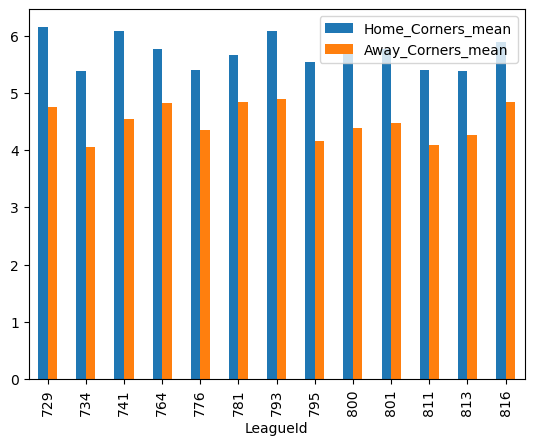

In [19]:
summary_by_league.plot.bar(y=["Home_Corners_mean", "Away_Corners_mean"], x="LeagueId")
plt.show()

There's clearly a home advantage in the goals and corners awarded

In [20]:
summary_by_league.describe()

,LeagueId,Home_Corners_mean,Away_Corners_mean,Home_Goals_mean,Away_Goals_mean,Away_Goals_count
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,781.076923,5.706593,4.497135,1.498217,1.115232,1832.461538
std,30.382181,0.281760,0.307194,0.086104,0.076705,547.976523
min,729.000000,5.372289,4.051136,1.374432,0.948864,689.000000
25%,764.000000,5.401676,4.270031,1.444004,1.078831,1551.000000
50%,793.000000,5.704488,4.478064,1.491340,1.140278,1911.000000
75%,801.000000,5.885532,4.812772,1.569859,1.156986,2258.000000
max,816.000000,6.146967,4.897291,1.634863,1.252597,2656.000000


In [21]:
df_train = df_train.sort_values(by = ["MatchId", "Date"])

In [22]:
df_train

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners
0,2826,793,2005-04-02,410,908,2.0,0.0,15,1
1,2827,793,2005-04-02,338,597,3.0,2.0,3,6
2,2828,793,2005-04-02,1364,246,2.0,3.0,13,2
3,2829,793,2005-04-02,1088,1397,1.0,0.0,2,5
4,2830,793,2005-04-02,830,1412,2.0,3.0,3,6
...,...,...,...,...,...,...,...,...,...
23826,307624,800,2010-12-18,944,8291,2.0,1.0,3,4
23827,307625,800,2010-12-18,4704,4705,4.0,0.0,4,4
23828,307626,800,2010-12-18,2113,250,1.0,1.0,5,5
23669,307965,781,2010-11-24,613,541,1.0,3.0,5,5


I now want to get cumulative statistics upto the current game for both the home and away teams for the whole dataset. I get the corners and goals that way.

In [23]:
from collections import defaultdict

def cumulative_values(col_name, df):
    hcol_history = defaultdict(list)
    hcol_avgs = []
    acol_history = defaultdict(list)
    acol_avgs = []

    for _, row in df.iterrows():
        hteamid = row["HomeTeamId"]
        ateamid = row["AwayTeamId"]

        # Home team
        if hcol_history[hteamid]:
            hcol_avgs.append(np.mean(hcol_history[hteamid]))
        else:
            hcol_avgs.append(np.nan)
        hcol_history[hteamid].append(row[f'Home_{col_name}'])

        # Away team
        if acol_history[ateamid]:
            acol_avgs.append(np.mean(acol_history[ateamid]))
        else:
            acol_avgs.append(np.nan)
        acol_history[ateamid].append(row[f'Away_{col_name}'])

    df[f'HomeTeam_CumulativeHome{col_name}Avg'] = hcol_avgs
    df[f'AwayTeam_CumulativeAway{col_name}Avg'] = acol_avgs

    return df

So far I have only calculated the goals or corners scored by the away team away and home team home. Now I would like to calculate the goals conceded or corners conceded by an away team away and a home team home.

In [24]:
# These are temporary columns just to use in the function
df_train['Home_GoalsConceded'] = df_train['Away_Goals']
df_train['Away_GoalsConceded'] = df_train['Home_Goals']
df_train['Home_CornersConceded'] = df_train['Away_Corners']
df_train['Away_CornersConceded'] = df_train['Home_Corners']

In [25]:
df_train.sort_values(by = ["MatchId", "Date"])
df_train = cumulative_values('Goals', df_train)
df_train = cumulative_values('Corners', df_train)
df_train = cumulative_values('GoalsConceded', df_train)
df_train = cumulative_values('CornersConceded', df_train)

In [26]:
df_train.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Home_GoalsConceded,...,Home_CornersConceded,Away_CornersConceded,HomeTeam_CumulativeHomeGoalsAvg,AwayTeam_CumulativeAwayGoalsAvg,HomeTeam_CumulativeHomeCornersAvg,AwayTeam_CumulativeAwayCornersAvg,HomeTeam_CumulativeHomeGoalsConcededAvg,AwayTeam_CumulativeAwayGoalsConcededAvg,HomeTeam_CumulativeHomeCornersConcededAvg,AwayTeam_CumulativeAwayCornersConcededAvg
0,2826,793,2005-04-02,410,908,2.0,0.0,15,1,0.0,...,1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2827,793,2005-04-02,338,597,3.0,2.0,3,6,2.0,...,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2828,793,2005-04-02,1364,246,2.0,3.0,13,2,3.0,...,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2829,793,2005-04-02,1088,1397,1.0,0.0,2,5,0.0,...,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2830,793,2005-04-02,830,1412,2.0,3.0,3,6,3.0,...,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_train.tail()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Home_GoalsConceded,...,Home_CornersConceded,Away_CornersConceded,HomeTeam_CumulativeHomeGoalsAvg,AwayTeam_CumulativeAwayGoalsAvg,HomeTeam_CumulativeHomeCornersAvg,AwayTeam_CumulativeAwayCornersAvg,HomeTeam_CumulativeHomeGoalsConcededAvg,AwayTeam_CumulativeAwayGoalsConcededAvg,HomeTeam_CumulativeHomeCornersConcededAvg,AwayTeam_CumulativeAwayCornersConcededAvg
23826,307624,800,2010-12-18,944,8291,2.0,1.0,3,4,1.0,...,4,3,1.383929,1.650000,6.160714,6.000000,1.258929,1.650000,4.178571,5.066667
23827,307625,800,2010-12-18,4704,4705,4.0,0.0,4,4,0.0,...,4,4,1.721311,0.902439,5.885246,4.024390,0.836066,1.829268,4.065574,6.487805
23828,307626,800,2010-12-18,2113,250,1.0,1.0,5,5,1.0,...,5,5,1.600000,1.250000,5.452632,5.100000,1.042105,1.700000,4.578947,6.600000
23669,307965,781,2010-11-24,613,541,1.0,3.0,5,5,3.0,...,5,5,NaN,NaN,5.412500,4.023529,NaN,NaN,5.750000,6.858824
23759,310017,811,2010-11-28,192,853,1.0,1.0,2,2,1.0,...,2,2,1.265306,1.282609,5.061224,4.565217,0.969388,1.206522,3.959184,5.097826


Most of the values are missing at the start due to sparsity but at the end you can see that the values are filled up.

I will now do the same for the League. I will get expanding means cause we expect leagues to be stable or reach an equilibrium after certain games as we saw earlier.

In [28]:
def League_cumulative_values(col_name, df):
    df = df.sort_values(['MatchId','Date'])
    df[f'League_Home{col_name}_Expmean'] = np.nan
    df[f'League_Away{col_name}_Expmean'] = np.nan
    for league_id, group in df.groupby('LeagueId'):
        group = group.sort_values(['MatchId','Date'])
        exp_mean1 = group[f'Home_{col_name}'].expanding().mean().shift(1)
        exp_mean2 = group[f'Away_{col_name}'].expanding().mean().shift(1)
        df.loc[group.index, f'League_Home{col_name}_Expmean'] = exp_mean1
        df.loc[group.index, f'League_Away{col_name}_Expmean'] = exp_mean2
    return df

In [29]:
df_train.sort_values(by = ["MatchId", "Date"])
df_train = League_cumulative_values('Goals', df_train)
df_train = League_cumulative_values('Corners', df_train)

In [30]:
df_train

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Home_GoalsConceded,...,HomeTeam_CumulativeHomeCornersAvg,AwayTeam_CumulativeAwayCornersAvg,HomeTeam_CumulativeHomeGoalsConcededAvg,AwayTeam_CumulativeAwayGoalsConcededAvg,HomeTeam_CumulativeHomeCornersConcededAvg,AwayTeam_CumulativeAwayCornersConcededAvg,League_HomeGoals_Expmean,League_AwayGoals_Expmean,League_HomeCorners_Expmean,League_AwayCorners_Expmean
0,2826,793,2005-04-02,410,908,2.0,0.0,15,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2827,793,2005-04-02,338,597,3.0,2.0,3,6,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,15.000000,1.000000
2,2828,793,2005-04-02,1364,246,2.0,3.0,13,2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,1.000000,9.000000,3.500000
3,2829,793,2005-04-02,1088,1397,1.0,0.0,2,5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.333333,1.666667,10.333333,3.000000
4,2830,793,2005-04-02,830,1412,2.0,3.0,3,6,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.250000,8.250000,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23826,307624,800,2010-12-18,944,8291,2.0,1.0,3,4,1.0,...,6.160714,6.000000,1.258929,1.650000,4.178571,5.066667,1.487495,1.061467,5.706655,4.392115
23827,307625,800,2010-12-18,4704,4705,4.0,0.0,4,4,0.0,...,5.885246,4.024390,0.836066,1.829268,4.065574,6.487805,1.487712,1.061441,5.705508,4.391949
23828,307626,800,2010-12-18,2113,250,1.0,1.0,5,5,1.0,...,5.452632,5.100000,1.042105,1.700000,4.578947,6.600000,1.488776,1.060991,5.704786,4.391783
23669,307965,781,2010-11-24,613,541,1.0,3.0,5,5,3.0,...,5.412500,4.023529,NaN,NaN,5.750000,6.858824,1.444444,1.163690,5.660059,4.846383


Lets also add day of the week cause sometimes players might be tired or it might holiday season and what not

In [31]:
df_train["Day_Of_Week"] = df_train['Date'].dt.day_of_week

Next up need to do two things, to get like a rolling performance of the home team and the away team in terms of goals and corners scored and conceded. the other thing is to get a h2h past performance if we can.

In [32]:
def Team_recent_performance(ha, col_name, df, window=5):
    df = df.sort_values(['MatchId', 'Date'])
    new_col = f'{ha}_{col_name}_RollMean_{window}'
    df[new_col] = np.nan
    for team_id, group in df.groupby(f'{ha}TeamId'):
        group = group.sort_values(['MatchId', 'Date'])
        roll_mean = group[f'{ha}_{col_name}'].rolling(window=window).mean().shift(1)
        df.loc[group.index, new_col] = roll_mean

    return df

Let us now apply this to the columns 

In [33]:
for col in ['Goals', 'GoalsConceded', 'Corners', 'CornersConceded']:
    df_train = Team_recent_performance('Home', col, df_train, window=5)
    df_train = Team_recent_performance('Away', col, df_train, window=5)

In [34]:
df_train

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Home_GoalsConceded,...,League_AwayCorners_Expmean,Day_Of_Week,Home_Goals_RollMean_5,Away_Goals_RollMean_5,Home_GoalsConceded_RollMean_5,Away_GoalsConceded_RollMean_5,Home_Corners_RollMean_5,Away_Corners_RollMean_5,Home_CornersConceded_RollMean_5,Away_CornersConceded_RollMean_5
0,2826,793,2005-04-02,410,908,2.0,0.0,15,1,0.0,...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2827,793,2005-04-02,338,597,3.0,2.0,3,6,2.0,...,1.000000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2828,793,2005-04-02,1364,246,2.0,3.0,13,2,3.0,...,3.500000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2829,793,2005-04-02,1088,1397,1.0,0.0,2,5,0.0,...,3.000000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2830,793,2005-04-02,830,1412,2.0,3.0,3,6,3.0,...,3.500000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23826,307624,800,2010-12-18,944,8291,2.0,1.0,3,4,1.0,...,4.392115,5,0.6,0.8,1.8,1.0,8.4,6.0,5.4,5.0
23827,307625,800,2010-12-18,4704,4705,4.0,0.0,4,4,0.0,...,4.391949,5,0.8,0.8,1.6,2.4,6.8,3.0,3.8,6.8
23828,307626,800,2010-12-18,2113,250,1.0,1.0,5,5,1.0,...,4.391783,5,3.0,1.4,1.6,1.4,6.2,4.6,4.4,6.6
23669,307965,781,2010-11-24,613,541,1.0,3.0,5,5,3.0,...,4.846383,2,NaN,NaN,NaN,NaN,5.4,3.0,2.0,3.8


In [35]:
def h2h_performance(col_name, df):
    df = df.sort_values(['MatchId', 'Date'])
    new_col1 = f'h2hHome_{col_name}_avg'
    new_col2 = f'h2hAway_{col_name}_avg'
    df[new_col1] = np.nan
    df[new_col2] = np.nan
    for team_id, group in df.groupby(['HomeTeamId','AwayTeamId']):
        group = group.sort_values(['MatchId', 'Date'])
        exp_mean1 = group[f'Home_{col_name}'].expanding().mean().shift(1)
        exp_mean2 = group[f'Away_{col_name}'].expanding().mean().shift(1)
        df.loc[group.index, new_col1] = exp_mean1
        df.loc[group.index, new_col2] = exp_mean2

    return df

In [36]:
df_train = h2h_performance('Goals', df_train)
df_train = h2h_performance('Corners', df_train)

In [37]:
df_train

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Home_GoalsConceded,...,Home_GoalsConceded_RollMean_5,Away_GoalsConceded_RollMean_5,Home_Corners_RollMean_5,Away_Corners_RollMean_5,Home_CornersConceded_RollMean_5,Away_CornersConceded_RollMean_5,h2hHome_Goals_avg,h2hAway_Goals_avg,h2hHome_Corners_avg,h2hAway_Corners_avg
0,2826,793,2005-04-02,410,908,2.0,0.0,15,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2827,793,2005-04-02,338,597,3.0,2.0,3,6,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2828,793,2005-04-02,1364,246,2.0,3.0,13,2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2829,793,2005-04-02,1088,1397,1.0,0.0,2,5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2830,793,2005-04-02,830,1412,2.0,3.0,3,6,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23826,307624,800,2010-12-18,944,8291,2.0,1.0,3,4,1.0,...,1.8,1.0,8.4,6.0,5.4,5.0,0.500000,3.000000,3.000000,5.500000
23827,307625,800,2010-12-18,4704,4705,4.0,0.0,4,4,0.0,...,1.6,2.4,6.8,3.0,3.8,6.8,1.000000,0.000000,8.000000,1.000000
23828,307626,800,2010-12-18,2113,250,1.0,1.0,5,5,1.0,...,1.6,1.4,6.2,4.6,4.4,6.6,NaN,NaN,NaN,NaN
23669,307965,781,2010-11-24,613,541,1.0,3.0,5,5,3.0,...,NaN,NaN,5.4,3.0,2.0,3.8,1.666667,1.166667,6.714286,3.714286


just adding columns with total goals, total corners for each game and as well may be who won.

In [38]:
df_train['Total_Corners'] = df_train['Home_Corners'] + df_train['Away_Corners']
df_train['Total_Goals'] = df_train['Home_Goals'] + df_train['Away_Goals']

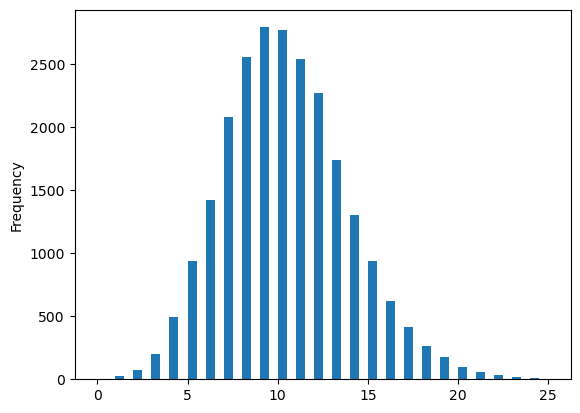

In [42]:
df_train['Total_Corners'].plot.hist(bins = 50)
plt.show()

In [43]:
df_train['Total_Corners'].describe()

count    23830.000000
mean        10.219471
std          3.451955
min          0.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         25.000000
Name: Total_Corners, dtype: float64

In [44]:
3.45**2

11.902500000000002

In [45]:
import seaborn as sns

<Axes: ylabel='Total_Corners'>

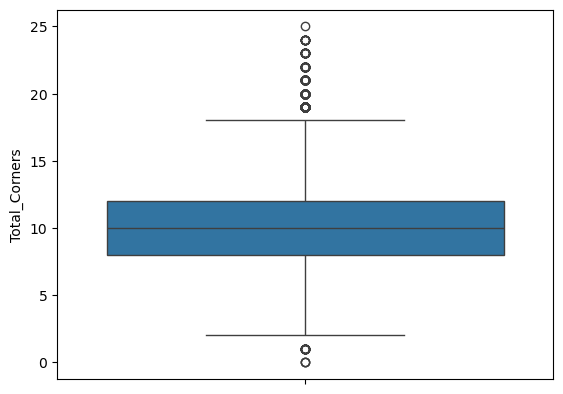

In [46]:
sns.boxplot(df_train['Total_Corners'])

The variance is slightly over the mean suggesting an over dispersion but its not too much. There are some outliers I feel We can assume its Poisson distributed for the best and then may be try a negative binomial later